In [25]:
import pandas as pd
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import r2_score

In [ ]:
file_path = r"C:\Users\beñat.egidazu\Desktop\Tests\Rini_IHOBE_VALIDATION\lst_csv.csv"

dataset = pd.read_csv(file_path)

print(dataset[:50])

dataset_cleaned = dataset.dropna(subset=['LST'])

print(dataset_cleaned)

El coeficiente de determinación R^2 es: -8.51


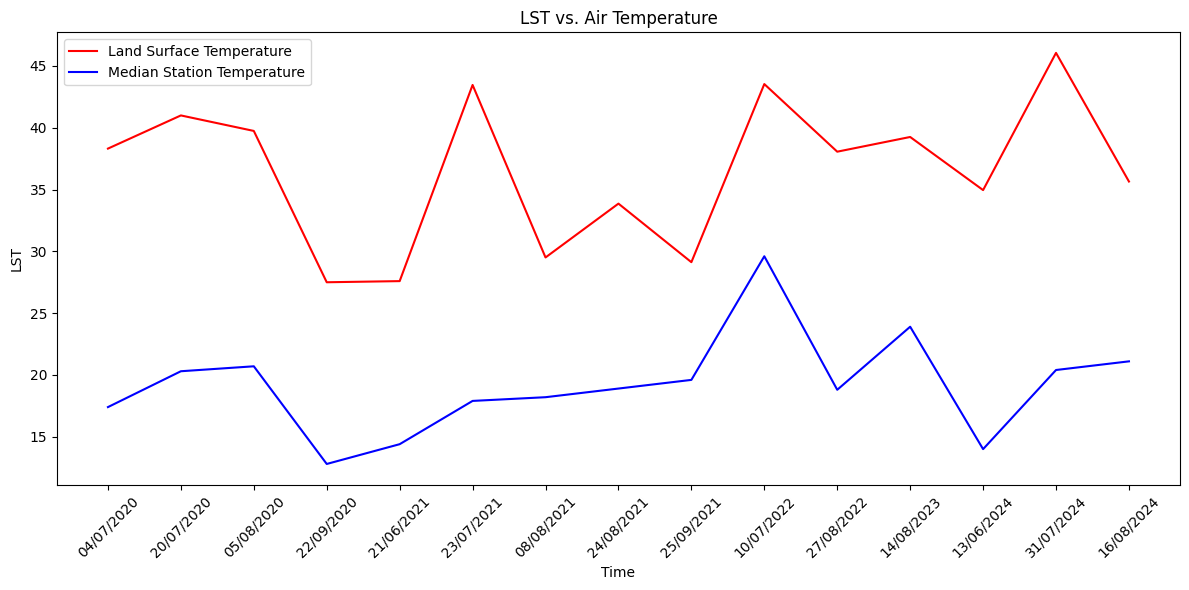

In [27]:
label = "Median_temp"

y_predicted = dataset_cleaned[label]
y_test = dataset_cleaned['LST']
r2 = r2_score(y_test, y_predicted)



print(f'El coeficiente de determinación R^2 es: {r2:.2f}')

fig, ax1 = plt.subplots(figsize=(12, 6))
        
# First axis for relative biomass:
ax1.set_xlabel('Time')
ax1.set_ylabel('LST', color='black')
ax1.plot(dataset_cleaned['StdTime'], dataset_cleaned['LST'], label='Land Surface Temperature', color='red')
ax1.plot(dataset_cleaned['StdTime'], dataset_cleaned[label], label='Median Station Temperature', color='blue')
ax1.tick_params(axis='y', labelcolor='black')  # Axis colour

# Configure the ticks of the axis
#ax1.set_xticks([pd.Timestamp(f'{year}-01-01') for year in years])  # Use the list of years
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Just show the year

# Establish the limits for the x axis ticks:
# ax1.set_xlim([training_data['time'].min() - pd.DateOffset(years=1), training_data['time'].max()])


# Rotate the xaxis ticks
plt.xticks(rotation=45)

# Second axis for the predictor
# ax2 = ax1.twinx()  # Create a second y axis that shares x axis
# ax2.set_ylabel('Maximum Temperature', color='black')
# ax2.plot(dataset_cleaned['StdTime'], dataset_cleaned['Maxima_temp'], label='Median_temp', color='blue')
# ax2.tick_params(axis='y', labelcolor='black')  # y second axis colour

# Plot title
plt.title(f'LST vs. Air Temperature')

# Ensure axis disposition is correct
fig.tight_layout()

# Show plot:
plt.legend()
plt.show()

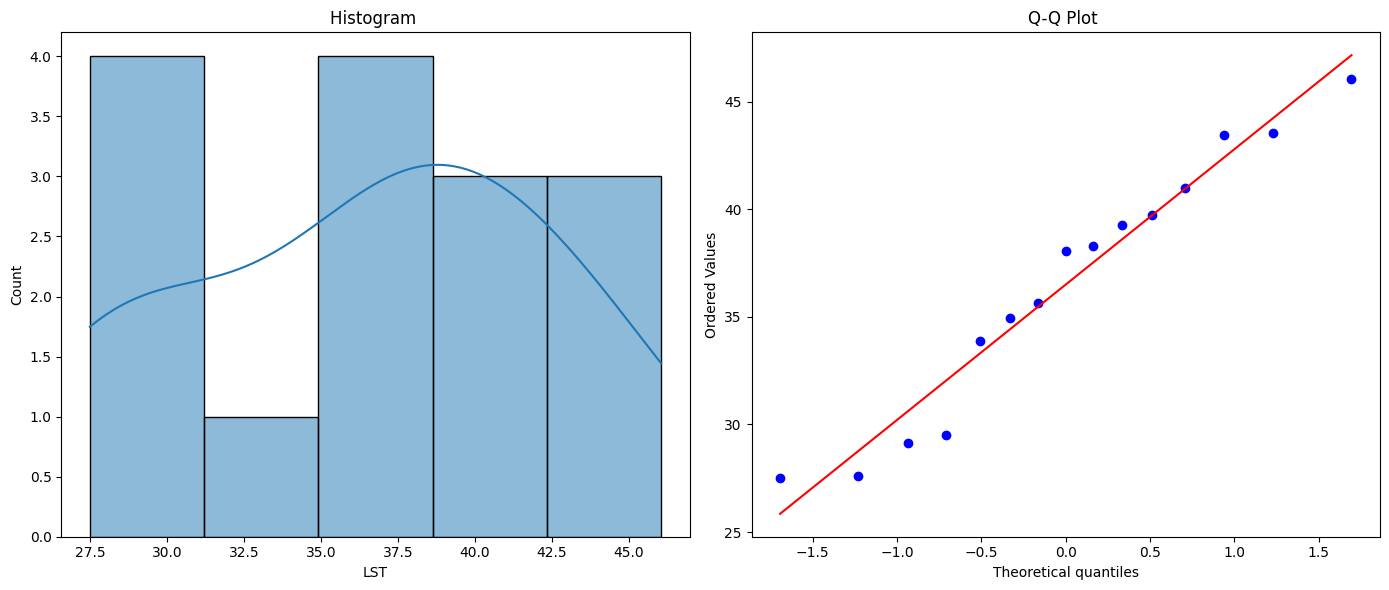

  Estadístico: 0.9416651725769043, P-valor: 0.4037717580795288


In [28]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(dataset_cleaned['LST'], kde=True)
plt.title(f'Histogram ')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(dataset_cleaned['LST'], dist="norm", plot=plt)
plt.title(f'Q-Q Plot ')

plt.tight_layout()
plt.show()

stat, p_value = stats.shapiro(dataset_cleaned['LST'].dropna())  # Delete NaNs before test
print(f'  Estadístico: {stat}, P-valor: {p_value}')



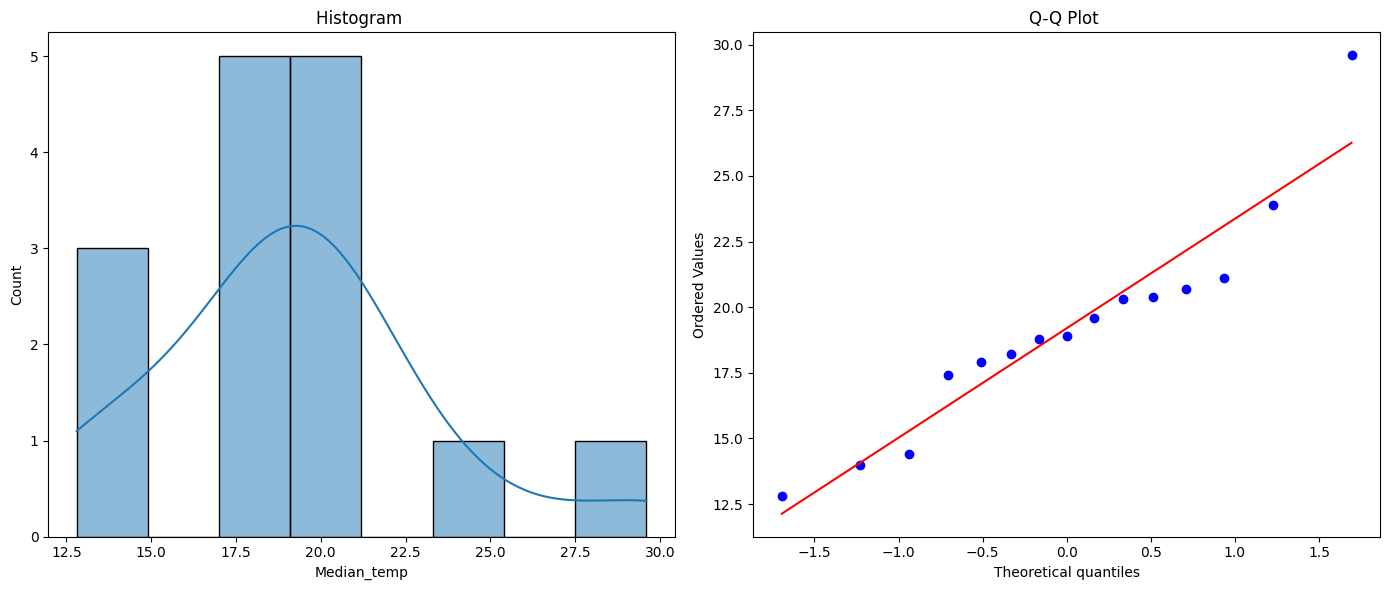

  Estadístico: 0.9243578910827637, P-valor: 0.22439047694206238


In [29]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(dataset_cleaned[label], kde=True)
plt.title(f'Histogram ')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(dataset_cleaned[label], dist="norm", plot=plt)
plt.title(f'Q-Q Plot ')

plt.tight_layout()
plt.show()

stat, p_value = stats.shapiro(dataset_cleaned[label].dropna())  # Delete NaNs before test
print(f'  Estadístico: {stat}, P-valor: {p_value}')

In [30]:
coef, p_value = pearsonr(y_test, y_predicted)

print(f"Coeficiente de Pearson: {coef}")
print(f"P-valor: {p_value}")

Coeficiente de Pearson: 0.5954313042973437
P-valor: 0.019183964152398987
